In [35]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import import_ipynb
import seaborn as sns
from functools import reduce
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

In [2]:
#As always we have to specify to jupyter that we want to see all the outputs.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 1000
pd.options.display.max_columns= 1000

In [3]:
%%capture

#the %%capture makes sure not the whole of last assignment is printed here

#import Dataframes as df


#This imports dataframes from other code.
%run "Dataframes.ipynb"


In [4]:
#framedict = df.framedict
framedict.keys()

dict_keys(['Deaths', 'Vaccination', 'Demographics', 'Age', 'Hospitals', 'Names'])

In [5]:
hosp_frame = framedict['Hospitals']


In [6]:
india_shp_MASTERS = './maps-master/maps-master/Districts/Census_2011/2011_Dist.shp'

In [7]:
india_s_masters = gpd.read_file(india_shp_MASTERS)
india_s_masters.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DISTRICT    641 non-null    object  
 1   ST_NM       641 non-null    object  
 2   ST_CEN_CD   641 non-null    int64   
 3   DT_CEN_CD   641 non-null    int64   
 4   censuscode  641 non-null    int64   
 5   geometry    641 non-null    geometry
dtypes: geometry(1), int64(3), object(2)
memory usage: 30.2+ KB


In [8]:
india_s_masters.head()

missingcheck(india_s_masters['censuscode'],641 )

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


0 values are missing.


[]

In [9]:
# We can merge the dataframes on the censuscodes. 
# These codes represent the numbers that were given to the districts
type(india_s_masters["censuscode"])
type(hosp_frame["censuscode"])

pandas.core.series.Series

pandas.core.series.Series

In [10]:
df.missingcheck(india_s_masters['DT_CEN_CD'],640)

AttributeError: 'DataFrame' object has no attribute 'missingcheck'

<AxesSubplot:>

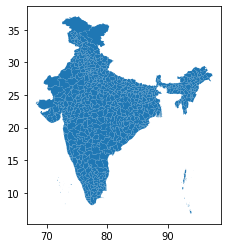

In [11]:
india_s_masters.plot()

In [12]:
##for joining two files
india_joined = india_s_masters.merge(champion,on='censuscode')
india_joined.head(2)

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,pc11_state_id,total_cases,total_deaths,pc11_pca_tot_p,deaths per 100.000,cases per 100.000,Literacy,population density,slum population,Urban population share,Beds (IC),Beds (total),Care facilities (hospitals/clinics),average age
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",28,0.0,0.0,2741239.0,0.000000,0.000000,1411281.0,330.31888,207383.0,0.396791,6.0,6.0,56.660927,29.494594
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",9,11831.0,182.0,4418797.0,4.118768,267.742555,2092567.0,887.23541,261491.0,0.331309,53.0,53.0,113.286920,24.707078


In [13]:
india_joined.loc[india_joined['ST_NM'] == 'NCT of Delhi']

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,pc11_state_id,total_cases,total_deaths,pc11_pca_tot_p,deaths per 100.000,cases per 100.000,Literacy,population density,slum population,Urban population share,Beds (IC),Beds (total),Care facilities (hospitals/clinics),average age
153,East,NCT of Delhi,7,4,93,"POLYGON ((77.30482 28.57678, 77.29593 28.58194...",7,0.0,0.0,1709346.0,0.000000,0.000000,681517.0,36073.20700,88075.000977,0.980015,NaN,NaN,NaN,29.417171
392,New Delhi,NCT of Delhi,7,5,94,"POLYGON ((77.26042 28.62286, 77.26267 28.62114...",7,750156.0,11436.0,142004.0,8053.294273,528263.992564,1611588.0,61283.39500,173453.886719,0.990397,NaN,NaN,NaN,29.946973
394,North,NCT of Delhi,7,2,91,"POLYGON ((77.21434 28.78352, 77.21329 28.78031...",7,0.0,0.0,887978.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.115772
396,North East,NCT of Delhi,7,3,92,"POLYGON ((77.25066 28.66244, 77.25021 28.66266...",7,0.0,0.0,2241624.0,0.000000,0.000000,2707855.0,10354.47900,376234.050781,0.941488,NaN,NaN,NaN,26.856877
399,North West,NCT of Delhi,7,1,90,"POLYGON ((77.17093 28.66833, 77.16689 28.67303...",7,0.0,0.0,3656539.0,0.000000,0.000000,599796.0,764.38702,20646.000000,0.226855,0.0,0.0,19.4284,28.811548
520,South,NCT of Delhi,7,9,98,"POLYGON ((77.26455 28.60747, 77.26558 28.60738...",7,0.0,0.0,2731929.0,0.000000,0.000000,442360.0,NaN,85146.181107,1.000000,NaN,NaN,NaN,27.868524
524,South West,NCT of Delhi,7,8,97,"POLYGON ((77.18253 28.64817, 77.18380 28.64638...",7,0.0,0.0,2292958.0,0.000000,0.000000,114179.0,NaN,11215.947510,1.000000,NaN,NaN,NaN,30.087117
582,West,NCT of Delhi,7,7,96,"POLYGON ((77.17093 28.66833, 77.17072 28.66817...",7,0.0,0.0,2543243.0,0.000000,0.000000,1352998.0,134998.11000,196756.546875,0.997935,NaN,NaN,NaN,29.089092


In [14]:
df = pd.DataFrame(np.random.randint(0,100,size=(641, 1)))

In [15]:
india_s_masters['random'] = df

In [16]:
india_s_masters.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,random
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",87
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",41
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...",3
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509...",14
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236...",65


In [17]:
# We drop the row with the data that is unclear
india_s_masters = india_s_masters[india_s_masters['censuscode'] != 0]

In [18]:
columns_to_plot = champion.columns.values.tolist()
type(columns_to_plot)

list

In [19]:
columns_to_plot.remove('pc11_state_id')
columns_to_plot.remove("censuscode")

In [20]:
columns_to_plot

['total_cases',
 'total_deaths',
 'pc11_pca_tot_p',
 'deaths per 100.000',
 'cases per 100.000',
 'Literacy',
 'population density',
 'slum population',
 'Urban population share',
 'Beds (IC)',
 'Beds (total)',
 'Care facilities (hospitals/clinics)',
 'average age']

<AxesSubplot:>

Text(0.5, 1.0, 'total_cases')

<AxesSubplot:>

Text(0.5, 1.0, 'total_deaths')

<AxesSubplot:>

Text(0.5, 1.0, 'pc11_pca_tot_p')

<AxesSubplot:>

Text(0.5, 1.0, 'deaths per 100.000')

<AxesSubplot:>

Text(0.5, 1.0, 'cases per 100.000')

<AxesSubplot:>

Text(0.5, 1.0, 'Literacy')

<AxesSubplot:>

Text(0.5, 1.0, 'population density')

<AxesSubplot:>

Text(0.5, 1.0, 'slum population')

<AxesSubplot:>

Text(0.5, 1.0, 'Urban population share')

<AxesSubplot:>

Text(0.5, 1.0, 'Beds (IC)')

<AxesSubplot:>

Text(0.5, 1.0, 'Beds (total)')

<AxesSubplot:>

Text(0.5, 1.0, 'Care facilities (hospitals/clinics)')

<AxesSubplot:>

Text(0.5, 1.0, 'average age')

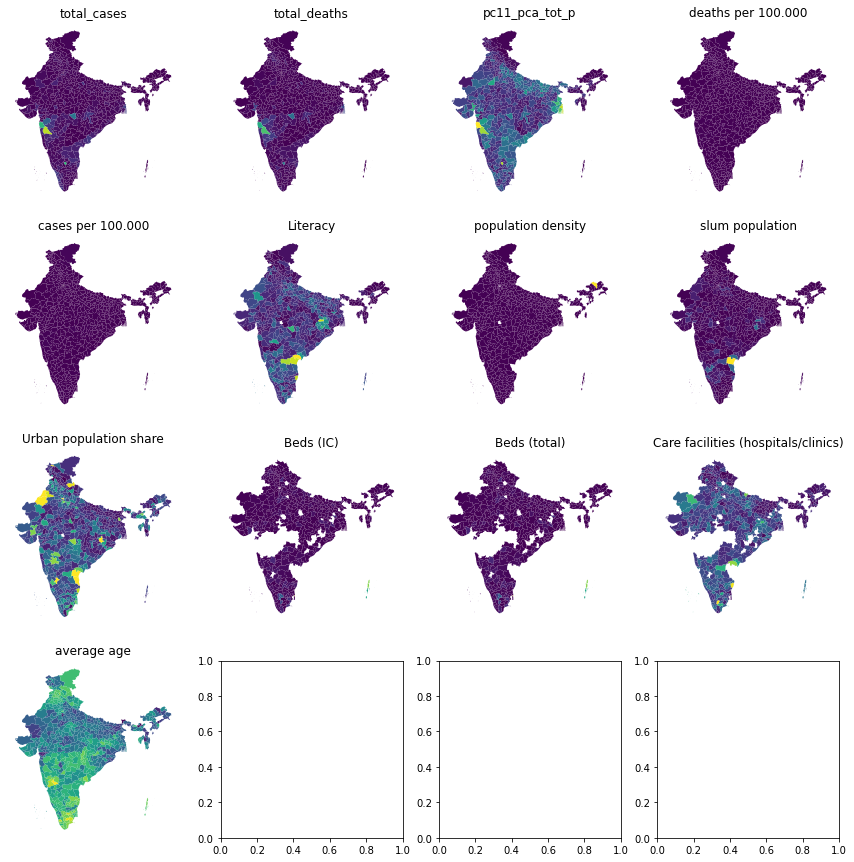

In [21]:
f, axs = plt.subplots(4,4, figsize=(15,15))
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axs[i]
    india_joined.plot(column=col, ax=ax, linewidth=0, cmap='viridis', alpha = 1)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()

In [22]:
column = ['population density']

<AxesSubplot:>

Text(0.5, 1.0, 'population density')

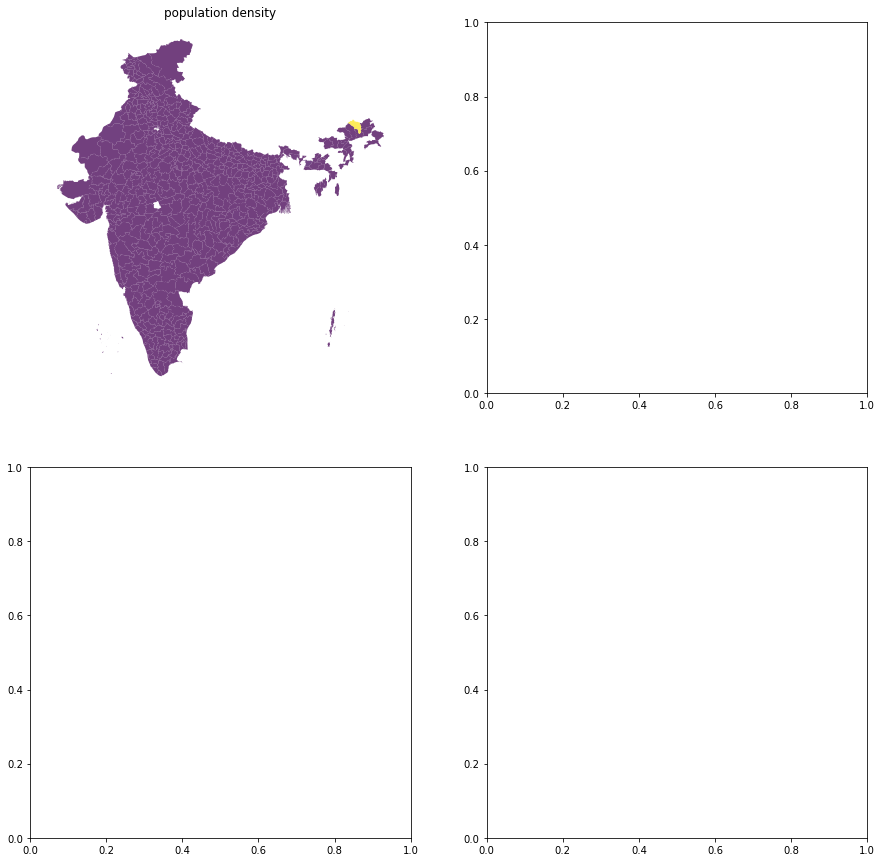

In [23]:
f, axs = plt.subplots(2,2, figsize=(15,15))
axs = axs.flatten()

for i, col in enumerate(column):
    ax = axs[i]
    india_joined.plot(column=col, ax=ax, linewidth=0, cmap='viridis', alpha = 0.75)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()

In [24]:
india_joined.sort_values("population density", ascending = False).head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,pc11_state_id,total_cases,total_deaths,pc11_pca_tot_p,deaths per 100.000,cases per 100.000,Literacy,population density,slum population,Urban population share,Beds (IC),Beds (total),Care facilities (hospitals/clinics),average age
563,Upper Siang,Arunanchal Pradesh,12,8,252,"POLYGON ((95.27230 29.04772, 95.27550 29.04492...",12,361.0,0.0,35320.0,0.000000,1022.083805,26073.0,4997700.000,0.000000,0.224143,0.0,0.0,17.106094,21.260834
154,East Garo Hills,Meghalaya,17,2,294,"POLYGON ((91.03234 25.88749, 91.03220 25.87930...",17,459.0,3.0,317917.0,0.943643,144.377306,90302.0,144182.000,0.000000,0.116845,0.0,0.0,8.230640,24.980466
582,West,NCT of Delhi,7,7,96,"POLYGON ((77.17093 28.66833, 77.17072 28.66817...",7,0.0,0.0,2543243.0,0.000000,0.000000,1352998.0,134998.110,196756.546875,0.997935,NaN,NaN,NaN,29.089092
392,New Delhi,NCT of Delhi,7,5,94,"POLYGON ((77.26042 28.62286, 77.26267 28.62114...",7,750156.0,11436.0,142004.0,8053.294273,528263.992564,1611588.0,61283.395,173453.886719,0.990397,NaN,NaN,NaN,29.946973
290,Koch Bihar,West Bengal,19,3,329,"MULTIPOLYGON (((89.02623 26.51818, 89.03012 26...",19,11999.0,72.0,2819086.0,2.554019,425.634408,187527.0,49390.500,19310.000000,0.071952,4.0,4.0,18.687963,22.591047


In [25]:
india_joined.loc(axis=0)[563]['population density']

4997700.0

In [26]:
india_joined.loc(axis=0)[563]

DISTRICT                                                                     Upper Siang
ST_NM                                                                 Arunanchal Pradesh
ST_CEN_CD                                                                             12
DT_CEN_CD                                                                              8
censuscode                                                                           252
geometry                               POLYGON ((95.27229607725387 29.04772215025158,...
pc11_state_id                                                                         12
total_cases                                                                        361.0
total_deaths                                                                         0.0
pc11_pca_tot_p                                                                   35320.0
deaths per 100.000                                                                   0.0
cases per 100.000    

In [27]:
scaler = MinMaxScaler()

In [28]:
print(scaler.fit(india_joined[columns_to_plot]))

MinMaxScaler()


In [29]:
scaler.data_max_

array([7.50156000e+05, 1.20930000e+04, 1.10601480e+07, 8.05329427e+03,
       5.28263993e+05, 8.22716100e+06, 4.99770000e+06, 3.91539225e+06,
       1.00000000e+00, 7.33000000e+02, 7.33000000e+02, 3.66035740e+02,
       3.37329506e+01])

In [30]:
india_scaled = (scaler.transform(india_joined[columns_to_plot]))

In [31]:
india_scaled = pd.DataFrame(india_scaled, columns= india_joined[columns_to_plot].columns)
india_scaled

,total_cases,total_deaths,pc11_pca_tot_p,deaths per 100.000,cases per 100.000,Literacy,population density,slum population,Urban population share,Beds (IC),Beds (total),Care facilities (hospitals/clinics),average age
0,0.000000,0.000000,0.247304,0.000000,0.000000,0.171092,0.000065,0.052966,0.396791,0.008186,0.008186,0.152481,0.697741
1,0.015771,0.015050,0.399089,0.000511,0.000507,0.253946,0.000177,0.066785,0.331309,0.072306,0.072306,0.307605,0.356319
2,0.116218,0.205889,0.652020,0.004286,0.002288,0.104404,0.000039,0.030522,0.232794,0.000000,0.000000,0.266153,0.374684
3,0.158646,0.109402,0.410342,0.003616,0.004959,0.141829,0.000115,0.012998,0.372580,NaN,NaN,NaN,0.519130
4,0.004148,0.000910,0.035496,0.000341,0.001472,0.004475,NaN,0.000766,0.222785,0.000000,0.000000,0.030424,0.241775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.003009,0.003804,0.004309,0.010268,0.007681,0.338973,0.000216,0.098790,0.651375,0.030014,0.030014,0.314920,0.700724
606,0.001764,0.000662,0.072295,0.000123,0.000310,0.072524,0.000077,0.004073,0.082625,0.008186,0.008186,0.122051,0.103415
607,0.000000,0.000000,0.020823,0.000000,0.000000,0.266498,0.000095,0.027713,0.150074,0.585266,0.585266,0.396979,0.707109
608,0.000000,0.000000,0.008830,0.000000,0.000000,0.197304,0.000088,0.021280,0.200799,0.813097,0.813097,0.382067,0.776296


In [32]:
india_joined[columns_to_plot] = india_scaled

In [33]:
india_joined

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,pc11_state_id,total_cases,total_deaths,pc11_pca_tot_p,deaths per 100.000,cases per 100.000,Literacy,population density,slum population,Urban population share,Beds (IC),Beds (total),Care facilities (hospitals/clinics),average age
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",28,0.000000,0.000000,0.247304,0.000000,0.000000,0.171092,0.000065,0.052966,0.396791,0.008186,0.008186,0.152481,0.697741
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",9,0.015771,0.015050,0.399089,0.000511,0.000507,0.253946,0.000177,0.066785,0.331309,0.072306,0.072306,0.307605,0.356319
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...",24,0.116218,0.205889,0.652020,0.004286,0.002288,0.104404,0.000039,0.030522,0.232794,0.000000,0.000000,0.266153,0.374684
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509...",27,0.158646,0.109402,0.410342,0.003616,0.004959,0.141829,0.000115,0.012998,0.372580,NaN,NaN,NaN,0.519130
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236...",15,0.004148,0.000910,0.035496,0.000341,0.001472,0.004475,NaN,0.000766,0.222785,0.000000,0.000000,0.030424,0.241775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,Yanam,Puducherry,34,1,634,"POLYGON ((82.22052 16.73898, 82.22431 16.73626...",34,0.003009,0.003804,0.004309,0.010268,0.007681,0.338973,0.000216,0.098790,0.651375,0.030014,0.030014,0.314920,0.700724
606,Tapi,Gujarat,24,26,493,"POLYGON ((74.08573 21.55513, 74.08672 21.55515...",24,0.001764,0.000662,0.072295,0.000123,0.000310,0.072524,0.000077,0.004073,0.082625,0.008186,0.008186,0.122051,0.103415
607,South Andaman,Andaman & Nicobar Island,35,3,640,"MULTIPOLYGON (((92.69758 12.23961, 92.69778 12...",35,0.000000,0.000000,0.020823,0.000000,0.000000,0.266498,0.000095,0.027713,0.150074,0.585266,0.585266,0.396979,0.707109
608,North & Middle Andaman,Andaman & Nicobar Island,35,2,639,"MULTIPOLYGON (((92.89905 12.91512, 92.89905 12...",35,0.000000,0.000000,0.008830,0.000000,0.000000,0.197304,0.000088,0.021280,0.200799,0.813097,0.813097,0.382067,0.776296


In [36]:
kmeans = cluster.KMeans(n_clusters=5)
np.random.seed(1234)
kmeanscls = kmeans.fit(india_joined[])